### 1. GDP versus Life expectancy (20%)

- Download the data file named gdp_life.csv from Moodle
- Load the data file into a Pandas data Frame using the read_csv() function
- Make histograms of GDP and Life Exp to see what the data distributions look like, do they make sense to you?
- Remove all the rows with NaNs
- Remove the outliers in your dataset if necessary
- Now look at the example of data filtering in Pandas data frames (see the "Asia" plot example in lecture notes/notebooks) make a similar bubble plot of GDP versus Life Exp as you've done in HW4 with all the continents, by setting the size of the bubbles using the population and the color of the bubbles using the continent: 
    - Asia (red)
    - Europe (blue)
    - Africa (green)
    - North America (yellow)
- NOTE: Use a **for**-loop to generate the bubble plot.

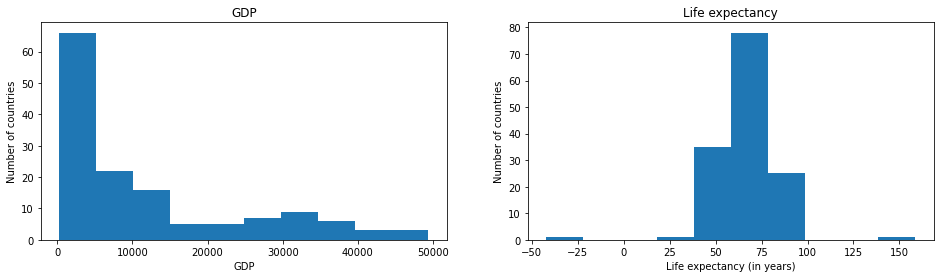

These two histograms do not make sense to me. The first histogram is probably an accurate representation of each countries GDP.
This seems like there are many GDP amounts less than 10000 in the first histogram.
The second histogram is suggesting that there are many life expectancies ending before 0 years. This seems inaccurate.


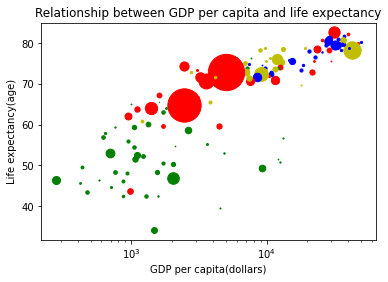

In [5]:
import pandas as pd              # I imported pandas
import numpy as np               # I imported numpy
import matplotlib.pyplot as plt  # I imported matplotlib.pyplot

gdplife = pd.read_csv ("gdp_life.csv")    # read csv

plt.figure(figsize=(16,4))                # plotted figure

plt.subplot (1,2,1)                       # plotted subplot of histogram
plt.hist(gdplife['GDP'], bins=10)         # plotted 10 bins of histogram
plt.xlabel('GDP')                         # labelled x axis
plt.ylabel('Number of countries')         # labelled y axis
plt.title('GDP')                          # titled the histogram

plt.subplot(1,2,2)                       # plotted subplot of histogram
plt.hist(gdplife['Life Exp'],bins=10)    # plotted 10 bins of histogram
plt.xlabel('Life expectancy (in years)') # labelled x axis
plt.ylabel('Number of countries')        # labelled y axis
plt.title('Life expectancy')             # titled the histogram
plt.show()                             

print('These two histograms do not make sense to me. The first histogram is probably an accurate representation of each countries GDP.')
print('This seems like there are many GDP amounts less than 10000 in the first histogram.')
print('The second histogram is suggesting that there are many life expectancies ending before 0 years. This seems inaccurate.')

gdplife_no_nan = gdplife.dropna()     # Removing rows with NaN 


# Filter the data
good_data = (gdplife_no_nan['Life Exp'] > 0) & (gdplife_no_nan['Life Exp'] < 110) 
life_exp_good = gdplife_no_nan[good_data]        # These are rows from 0 to 110
for index, row in life_exp_good.iterrows():      # Index the rows and columns                
                                                 # plot(index,row['GDP'], row['Life Exp'])
    if row['continent']=='Asia':
        plt.scatter(row['GDP'],row['Life Exp'],row['Population'],color='r') # Asia plot
    elif row['continent']=='Europe':
        plt.scatter(row['GDP'],row['Life Exp'],row['Population'],color='b') # Europe plot
    elif row['continent']=='Africa':
        plt.scatter(row['GDP'],row['Life Exp'],row['Population'],color='g') # Africa plot
    elif row['continent']=='North America':
        plt.scatter(row['GDP'],row['Life Exp'],row['Population'],color='y') # North America plot
    else:
        pass
plt.title('Relationship between GDP per capita and life expectancy') # title
plt.xlabel('GDP per capita(dollars)')                                # label x-axis
plt.ylabel('Life expectancy(age)')                                   # label y-axis
plt.xscale('log')                                                    # x-axis is scaled to log
plt.show()                                                           # Show the plot

### 2. Earthquakes (20%)

- load the data file "Eq_last5Years.csv", use the .head() function to take a first look at the data file.
- print out the column index using the .columns attribute of your data frame (so you know what names to use for column access!)
- make two histograms (use subplot() to generate a left and a right panel) to show the distributions of depth and magnitude of all the earthquakes in the last five years. Play with the plt.yscale() function and choose a proper axis scale to visualize the results.
- plot the depth all the measured earthquakes as a function of magnitude, is there a connection between the two quantites? 
- Use a global map projection, to show the locations of all the shallow earthquakes with depth less than 70 km. What are the geological indications of these locations? 
- Now plot all the deep earthquakes with depth greater than 450 km, what are the geological indications of these locations?

                       time  latitude  longitude  depth  mag magType  nst  \
0  2016-12-15T22:23:28.760Z   -9.9259   160.5101  35.00  5.3      mb  NaN   
1  2016-12-15T01:29:27.610Z  -29.1659    61.0004  13.71  5.3      mb  NaN   
2  2016-12-15T01:06:28.010Z   10.1317   126.1709  80.09  5.1      mb  NaN   
3  2016-12-15T00:18:43.610Z  -21.8244  -174.5947  10.00  5.2      mb  NaN   
4  2016-12-14T21:26:49.010Z  -21.9504  -174.4391  34.84  5.3      mb  NaN   

     gap   dmin   rms  ...                   updated  \
0   32.0  0.736  1.14  ...  2016-12-15T22:40:35.040Z   
1   62.0  9.275  1.29  ...  2016-12-15T01:57:38.040Z   
2  103.0  3.098  1.16  ...  2016-12-15T07:52:00.028Z   
3   67.0  5.160  1.36  ...  2016-12-15T02:00:07.507Z   
4   82.0  5.104  1.44  ...  2016-12-14T21:46:35.040Z   

                                 place        type horizontalError depthError  \
0  82km SE of Honiara, Solomon Islands  earthquake             5.9        2.0   
1               Southwest Indian Ridge

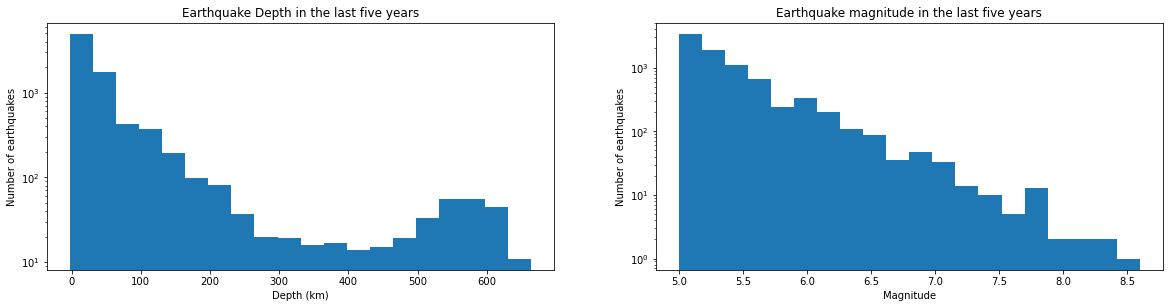

They do not have a connection, but more earthquake occurs in lower magnitudes.


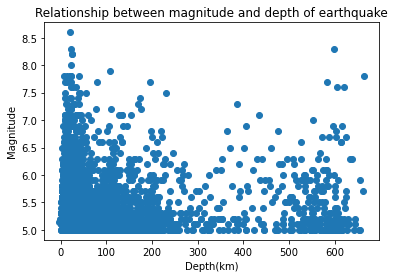

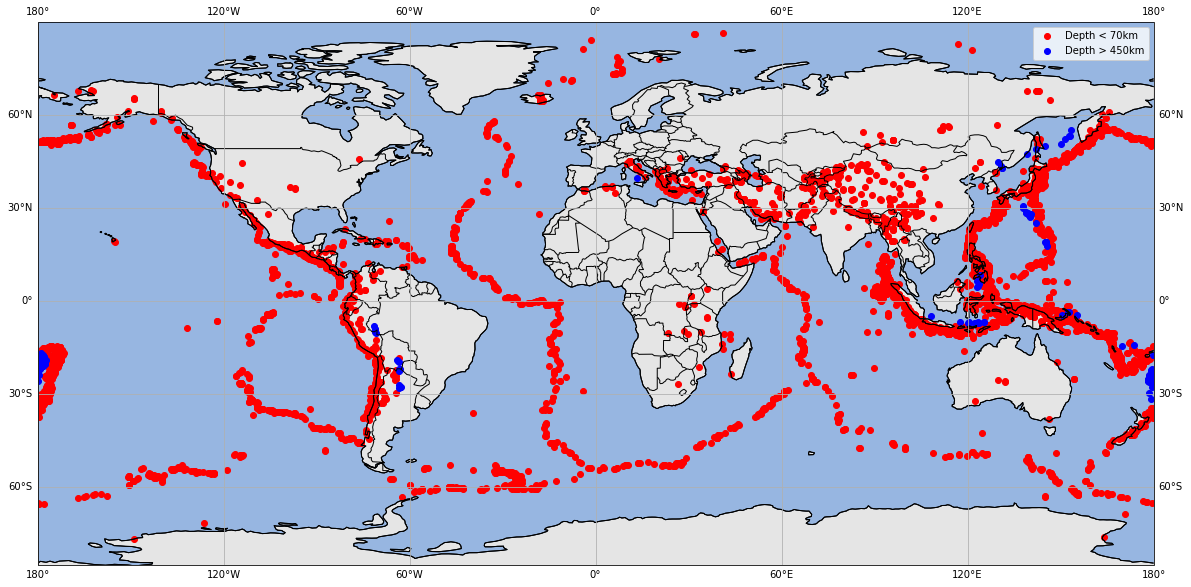

The less than 70 km earthquakes are mostly located around the rim of the Pacfic Ocean (Ring of Fire) and Atlantic Ocean
Most of the earthquakes that are more than 450km in depth exist near convergent boundaries


In [33]:
import pandas as pd                      # Import pd
import numpy as np                       # Import np
import matplotlib.pyplot as plt          # Import plt
import cartopy as cp                    # Import crs  
import cartopy.feature as cfeature       # Import cfeature

file = "Eq_last5Years.csv"               # Define file
Eq = pd.read_csv(file, skiprows=1)       # Load file
print(Eq.head())                         # Show first 5 rows
print(Eq.columns[0:])                    # Print out column index

plt.figure(figsize=(20,10))               # Set up figure size (12,8)

# First plot
plt.subplot(2,2,1)
plt.hist(Eq['depth'], bins=20)                         # Plot depth
plt.title('Earthquake Depth in the last five years')   # Add title
plt.xlabel('Depth (km)')                               # Label x-axis 
plt.ylabel('Number of earthquakes')                    # Label y-axis
plt.yscale('log')                                      # log x-scale

# Second plot
plt.subplot(2,2,2)
plt.hist(Eq['mag'], bins=20)                             # Plot magnitude
plt.title('Earthquake magnitude in the last five years') # Add title
plt.xlabel('Magnitude')                                  # Label x-axis
plt.ylabel('Number of earthquakes')                      # Label y-axis
plt.yscale('log')                                        # log x-scale
plt.show()                                               # Show the figures

# Scatter plot of Magnitude and Depth
plt.scatter(Eq['depth'],Eq['mag'])                                  # Plot magnitude and depth
plt.title('Relationship between magnitude and depth of earthquake') # Add title
plt.xlabel('Depth(km)')                                             # Label x-axis
plt.ylabel('Magnitude')                                             # Label y-axis
plt.figure(figsize=(20,10))                                         # Figure size

print('They do not have a connection, but more earthquake occurs in lower magnitudes.')

 
# First map
# Make a hammer map called map

m = plt.axes(projection=cp.crs.PlateCarree(central_longitude=0))     # Added map as "m"
m.coastlines()                                                       # plot coastlines
m.coastlines(resolution='110m')                                      # set the coastline resolution  

# MAP FEATURES 
m.gridlines(draw_labels=True)                                            # draw lat-lon labels
m.add_feature(cfeature.OCEAN)                                            # add ocean color
m.add_feature(cfeature.LAND, color='grey', edgecolor='black', alpha=0.2) # added land color with black lines
m.add_feature(cfeature.BORDERS)                                          # add country borders

depthless = Eq.loc[(Eq["depth"] < 70)]             # Filter the data, only earthquakes with depth lower than 70 km left
lon = np.array(depthless["longitude"])             # Define lon as longitude after filtering
lat = np.array(depthless["latitude"])              # Define lat as latitude after filtering
x,y =(lon, lat)                                    # Convert the latitude and longitude into map coordinate
plt.scatter(x,y, color='r',label='Depth < 70km')   # Plot data points with depth less than 70 km
plt.legend()                                       # Add legend

depthdeep = Eq.loc[(Eq["depth"] > 450)]            # Filter the data, only earthquakes with depth higher than 450 km
lon=np.array(depthdeep["longitude"])               # Define lon as longitude after filtering
lat=np.array(depthdeep["latitude"])                # Define lat as latitude after filtering
x,y =(lon, lat)                                    # Convert the latitude abd longitude into map coordinate
plt.scatter(x,y, color='b', label='Depth > 450km') # Plot data points with depth higher than 450 km
plt.legend()                                       # Add legend

plt.show() # Show map
print('The less than 70 km earthquakes are mostly located around the rim of the Pacfic Ocean (Ring of Fire) and Atlantic Ocean')
print('Most of the earthquakes that are more than 450km in depth exist near convergent boundaries')

### 3. Seismology, P-waves and S-waves (20%)

The farther away an earthquake is from a receiver, the more time there is between the arrivals of the P and S waves.  This makes sense if you think about racing a little kid (who is on a tricycle) around a track.  The distance between you will just keep increasing as you run because the kid on the trike is slower (like the S wave). [Well, until you lap the little tyke.] 

You can use the difference between the arrival times of the two waves to calculate the distance to the earthquake source, if we know the velocities of the waves through the Earth.  So first we need to know how these two waves behave.  

There are plenty of data on earthquakes and the arrival times of different waves. Here is a short video demonstration. 

https://www.iris.edu/hq/inclass/animation/traveltime_curves_how_they_are_created  

- Download the data file "SP_DeltaTime.txt" and load it into Python as a data frame using the pandas function .read_csv(). _NOTE_:
   - We need to skip the first two rows. We use the keyword argument **skiprows=2** in the read_csv() function to do that. 
   - **pd.read_csv( )** reads 'comma separated variables' by default but this file is _whitespace_ delimited. _whitespace_ is either spaces or tabs.   The keyword argument **delim_whitespace=True** will split on white space.
- Use the head() function to take a look at what datasets are included in the data frame. We see that the  columns of **DeltaTimeData**  are: 
    - "Deg": the degrees away from the source (the angle from the center of the Earth)
    - "M": the time of the P wave arrival in minutes
    - "S": the  P wave arrival in seconds
    - "M.1": the difference in the P and S wave arrival time in  minutes and 
    - "S.1" is same interval in seconds.  
- Change the column names to be "Degrees", "P_wave_minutes", "P_wave_seconds", "S-P_minutes", "S-P_seconds"
- What we really want for calculating the seismology is the arrival time in **decimal minutes**, not  minutes and seconds as in this data file.  Now defining a new column called "P_decimal_minutes" by converting the seconds data to decimal minutes (divide by 60) and add that to the minutes. 
- Now create another new column called "S-P_decimal_minutes" using the "S-P_minutes" and "S-P_seconds"
- Which one travels faster? Estimate the mean speed for the P-waves and S-waves
- **[Extra Credit (10%)]** Calculate wave speeds of P-wave and S-wave as a function of time, make a separate plot to show it.


   Deg  M     S  M.1   S.1
0  0.0  0   5.4    0   4.0
1  0.5  0  10.6    0   7.8
2  1.0  0  17.7    0  13.5
3  1.5  0  24.6    0  19.0
4  2.0  0  31.4    0  24.4
     Degrees  P_wave_minutes  P_wave_seconds  S-P_minutes  S-P_seconds  \
0        0.0               0             5.4            0          4.0   
1        0.5               0            10.6            0          7.8   
2        1.0               0            17.7            0         13.5   
3        1.5               0            24.6            0         19.0   
4        2.0               0            31.4            0         24.4   
..       ...             ...             ...          ...          ...   
111    101.0              13            45.9           11         35.8   
112    102.0              13            50.4           11         39.7   
113    103.0              13            54.8           11         43.6   
114    104.0              13            59.2           11         47.5   
115    105.0            

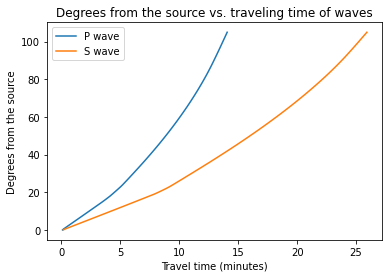

The average speed of P wave is 7.467109162024416 degree/minute
The average speed of S wave is 4.051186418879814 degree/minute


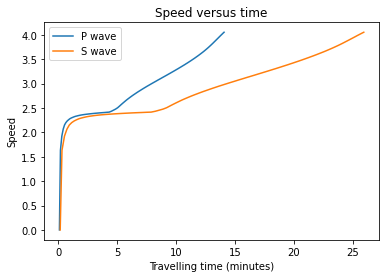

In [40]:
import pandas as pd              # Import pandas
import numpy as np               # Import numpy
import matplotlib.pyplot as plt  # Import matplotlib submodule pyplot

sp = pd.read_csv("SP_DeltaTime.txt",skiprows=2,delim_whitespace=True) # Load file
print(sp.head())                                                      # Print first 5 rows

# First plot
# Renamed all the columns
sp.rename(columns={'Deg':'Degrees','M':'P_wave_minutes','S':'P_wave_seconds','M.1':'S-P_minutes','S.1':'S-P_seconds'},inplace=True)
sp['P_decimal_minutes'] = sp['P_wave_minutes'] + (sp['P_wave_seconds'] / 60)  # Calculate P wave travelling time in minutes
sp['S-P_decimal_minutes'] = sp['S-P_minutes'] + (sp['S-P_seconds'] / 60)      # Calculate travelling time difference between S and P wave in minutes
sp['S_decimal_minutes'] = sp['P_decimal_minutes'] + sp['S-P_decimal_minutes'] # Calculate S wave travelling time
print(sp) 

plt.plot(sp['P_decimal_minutes'],sp['Degrees'],label='P wave')      # Plot P wave
plt.plot(sp['S_decimal_minutes'],sp['Degrees'],label='S wave')      # Plot S wave
plt.xlabel('Travel time (minutes)')                                 # Label x-axis
plt.ylabel('Degrees from the source')                               # Label y-axis
plt.title('Degrees from the source vs. traveling time of waves') # Add title
plt.legend()                                                     # Add legend

plt.show()                                                       # Show plot

#Second plot
s_mean = max(sp.Degrees)/max(sp.S_decimal_minutes) # Calculate mean speed of S wave
p_mean = max(sp.Degrees)/max(sp.P_decimal_minutes) # Calculate mean speed of P wave
print('The average speed of P wave is', p_mean,'degree/minute')  # Print out mean speed of P wave
print('The average speed of S wave is', s_mean, 'degree/minute') # Print out mean speed of S wave

p_speed = sp.Degrees/sp.S_decimal_minutes # Calculate wave speed
s_speed = sp.Degrees/sp.S_decimal_minutes # Calculate wave speed
plt.plot(sp['P_decimal_minutes'],p_speed,label='P wave') # Plot P wave speed vs. time
plt.plot(sp['S_decimal_minutes'],s_speed,label='S wave') # Plot S wave speed vs. time 
plt.xlabel('Travelling time (minutes)') # Label x-axis
plt.ylabel('Speed')                     # Label y-axis
plt.title('Speed versus time')          # Add title
plt.legend()                            # Add legend

plt.show() # Show Plot

### 4. Typhoons in 2018 (40%)

- Download all the datasets for the Typhoons in 2018 from Moodle (the **TyphoonData** folder) to you own computer
- The Typhoon **Jongdari** (Typhoon201812_JONGDARI.xlsx) had a very weird path, load the Typhoon Jongdari data into Python use Pandas, and plot the track of the Typhoon Jongdari on a **local map** with a black line
- On top of the black track line, add a bubble plot of the path colored by it's "Class": 2(blue), 3(green), 4(yellow), 5(red), 6(magenda)
- Now start a new figure, use the _glob_ module together with a _for_-loop to go through all the Excel files in the "TyphoonData" folder you've downloaded from Moodle. Show the tracks of all the Typhoons in 2018 **in one figure** using the **Orthographic Projection** of the Earth (no need to color it by it's Class, you can try that though, I'll give you 5% extra if you do so). Mark the starting point of each Typhoon using a star (marker = "*"), and mark the end points of each Typhoon using a plus sign (marker = "+")
- Calculate the variable "gradP" (you've already used it in your in-class practice), which is the absolute pressure difference between the measured pressure and the maximum pressure, make a scatter plot showing the relationship between gradP and Wind speed in all the Typhoons (HINT: use the glob module to step through all the data files). Make sure you clean the datasets by removing all the outliers in the wind speed (there are zeros in the Wind data, these are invalid wind measurements).
- **[Extra Credit (10%)]** What's the minimum, maximum and median latitude of the starting points of all the Typhoons? What about the same information for the Pressure and Wind speed?

    Year  Month  Day  Hour  Lat.  Long.  Pressure (hPa)  Wind (kt)  Class
0   2018      7   23    18  17.4  137.0            1002          0      2
1   2018      7   24     0  18.2  136.9            1002          0      2
2   2018      7   24     6  19.2  136.7            1002          0      2
3   2018      7   24    12  19.7  136.7             998         35      3
4   2018      7   24    18  20.3  136.6             998         35      3
..   ...    ...  ...   ...   ...    ...             ...        ...    ...
56  2018      8    3    12  31.8  120.4             998          0      2
57  2018      8    3    18  33.2  119.2             998          0      2
58  2018      8    4     0  33.7  118.1            1000          0      2
59  2018      8    4     6  34.0  117.2            1000          0      2
60  2018      8    4    12  34.1  115.7            1002          0      2

[61 rows x 9 columns]


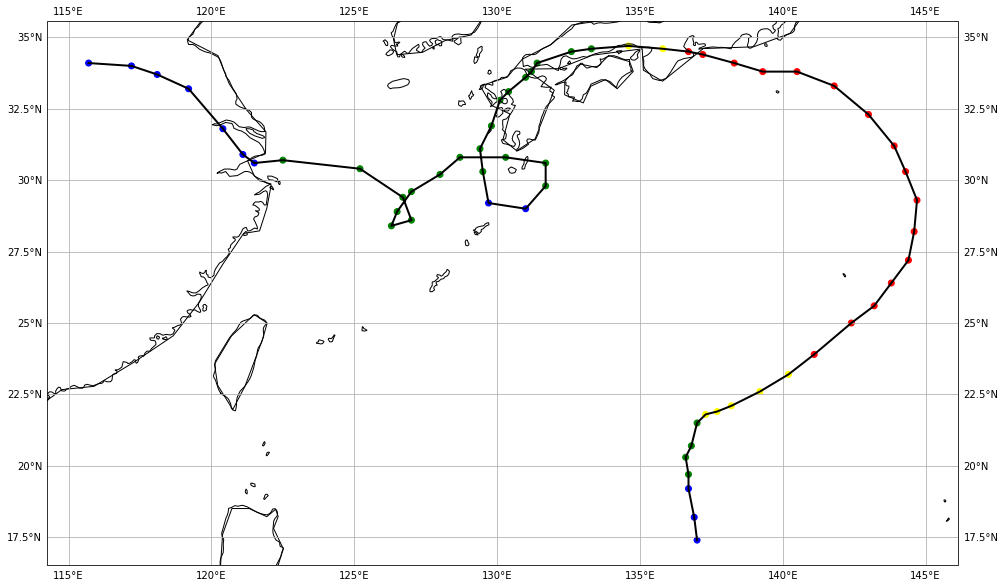

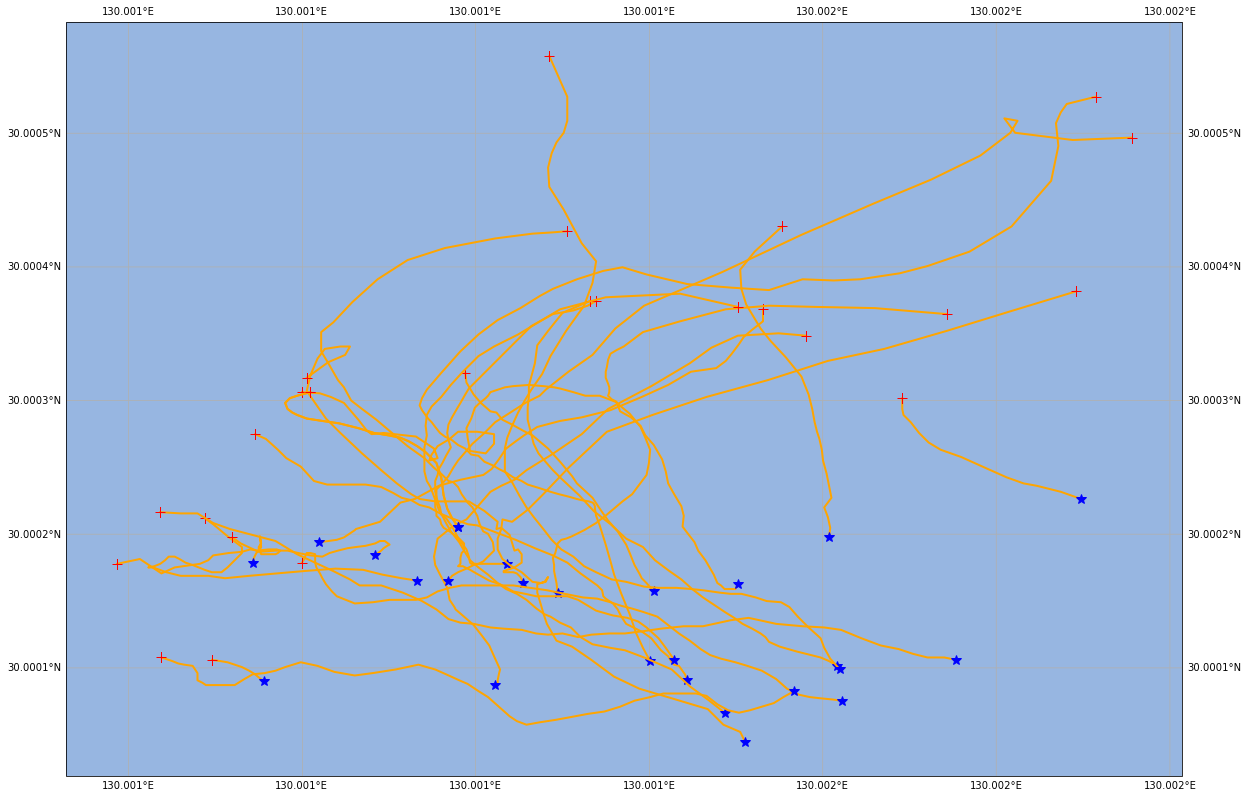

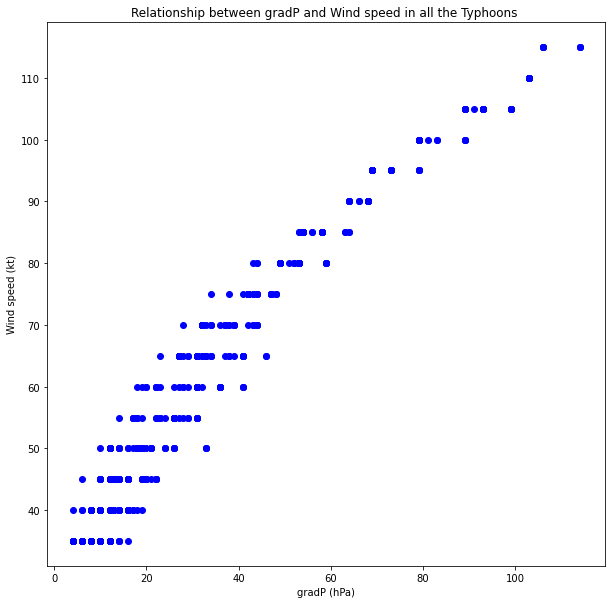

The maximum starting latitude is 25.2 degree.
The maximum starting pressure is 1008 hPa.
The maximum starting wind speed is 40 kt.
The minimum starting latitude is 5.0 degree.
The minimum starting pressure is 996 hPa.
The minimum starting wind speed is 0 kt.
The median starting latitude is 17.45 degree.
The median starting pressure is 1004.0 hPa.
The median starting wind speed is 0.0 kt.


In [38]:
import pandas as pd                   # Import pandas
import numpy as np                    # Import numpy
import matplotlib.pyplot as plt       # Import matplotlib submodule pyplot
import cartopy as cp                  # Import crs  
import cartopy.feature as cfeature    # Import cfeature

Jongdari = pd.read_excel("TyphoonData/Typhoon201812_JONGDARI.xlsx") # Load file
print(Jongdari)                                                     # Print out the file for first look

# First figure
plt.figure(figsize=(20, 10))
m = plt.axes(projection=cp.crs.PlateCarree(central_longitude=0))     # Added map as "m"
m.coastlines()                                                       # plot coastlines
m.coastlines(resolution='110m')                                      # set the coastline resolution  
m.gridlines(draw_labels=True)                                        # draw lat-lon labels     

# MAP FEATURES - Typhoon path
lon_j = list(Jongdari['Long.'])           # list of classes
lat_j = list(Jongdari['Lat.'])            # list of color
x,y   = (lon_j, lat_j)                    # color data points
plt.plot(x,y,color = 'k', linewidth=2)    # plot data

class_name = [1,2,3,4,5,6]                             # List of classes
color_name = ['blue','green','yellow','red','magenta'] # List of color
Jongdari['color'] = pd.cut(Jongdari['Class'],class_name,labels=color_name) # Color data points
plt.scatter(x,y,color=Jongdari.color)                  # Plot data

# Second figure
plt.figure(figsize=(20,20))

# MAP FEATURES - All Typhoons on orthographic map  #Okay I don't know why it is not plotting on an Orthographic scale?
m = plt.axes(projection=cp.crs.Orthographic(central_longitude=130,central_latitude=30)) # create an Orthographic projection map
m.gridlines(draw_labels=True)   # draw lat-lon labels     
m.add_feature(cfeature.OCEAN)   # add ocean color
m.add_feature(cfeature.LAND, edgecolor='black') # added land color with black lines
m.add_feature(cfeature.BORDERS) # add country borders
import glob #import glob module
file = glob.glob("TyphoonData/Typhoon2018*.xlsx") # Generate a list of all files with name called TyphoonData2018
# Use for-loop to load file          
for f in file:
    df = pd.read_excel(f)# Load data  
    # Change longitude and latitude DataFrame into list
    lon = list(df['Long.'])
    lat = list(df['Lat.'])
    x,y = (lon,lat)                          # Convert the list into map coordinates
    plt.plot(x,y,color='orange',linewidth=2) # Plot tracks of each typhoon
    df_lon = df['Long.'].loc[0]              # Find the longitude of starting point 
    df_lat = df['Lat.'].loc[0]               # Find the latitude of starting point
    x,y =(df_lon,df_lat)                     # Convert the coordinate of ending point into map coordinate
    plt.plot(x,y,'*',color='blue',markersize=10) # Plot the starting point
    ef_lon = df.iloc[-1] ['Long.']                 # Find the longitude of ending point
    ef_lat = df.iloc[-1]['Lat.']                   # Find the latitude of ending point
    x,y = (ef_lon,ef_lat)                          # Convert the coordinate of ending point into map coordinate
    plt.plot(x,y,'+',color='red',markersize=10) # Plot the ending point
plt.show() # Show map


# Third figure
# Use for-loop to load file
plt.figure(figsize=(10,10))
for t in file:
    alltyphoon = pd.read_excel(t) # Load file
    alltyphoon['gradP'] = alltyphoon['Pressure (hPa)'].max()- alltyphoon['Pressure (hPa)'] # Creat a new column called gradP to collect the difference between highest and measured pressure
    all_good = (alltyphoon['Wind (kt)']>0) & (alltyphoon['Wind (kt)']<150) # Filter data, only good data lift
    typhoon_good = alltyphoon[all_good]                    # Select rows will wind speed within 0 to 150 kt
    plt.scatter(typhoon_good['gradP'],typhoon_good['Wind (kt)'],color='b')  # Plot gradP
plt.xlabel('gradP (hPa)')     # Label x-axis
plt.ylabel('Wind speed (kt)') # Label y-axis
plt.title('Relationship between gradP and Wind speed in all the Typhoons ') # Add title
plt.show() # Show plot

start_lat = [] # Create a list called start_lat to collect the starting latitude of each typhoon
start_pres = [] # Create a list called start_pres to collect the starting pressure of each typhoon
start_wind = [] # Create a list called start_lat to collect the starting wind speed of each typhoon
# Use for-loop to load every file
for f in file:
    df = pd.read_excel(f)# Load data
    start_lat.append(df['Lat.'].loc[0]) # Add starting latitude into the list
    start_pres.append(df['Pressure (hPa)'].loc[0]) # Add starting pressure into the list
    start_wind.append(df['Wind (kt)'].loc[0]) # Add starting latitude into the list

max_start_lat = max(start_lat) # Find maximum starting latitude
max_start_pres = max(start_pres) # Find maximum starting pressure
max_start_wind = max(start_wind) # Find maximum starting wind speed
print('The maximum starting latitude is',max_start_lat, 'degree.') # Print maximum starting latitude
print('The maximum starting pressure is',max_start_pres, 'hPa.') # Print maximum starting pressure
print('The maximum starting wind speed is',max_start_wind, 'kt.') # Print maximum starting wind speed
min_start_lat = min(start_lat) # Find minimum starting latitude
min_start_pres = min(start_pres) # Find minimum starting pressure
min_start_wind = min(start_wind) # Find minimum starting wind speed
print('The minimum starting latitude is',min_start_lat, 'degree.') # Print minimum starting latitude
print('The minimum starting pressure is',min_start_pres, 'hPa.') # Print minimum starting pressure
print('The minimum starting wind speed is',min_start_wind, 'kt.') # Print minimum starting wind speed
median_start_lat = np.median(np.array(start_lat)) # Find median starting latitude
median_start_pres = np.median(np.array(start_pres)) # Find median starting pressure
median_start_wind = np.median(np.array(start_wind)) # Find median starting wind speed
print('The median starting latitude is',median_start_lat, 'degree.') # Print median starting latitude
print('The median starting pressure is',median_start_pres, 'hPa.') # Print median starting pressure
print('The median starting wind speed is',median_start_wind, 'kt.') # Print median starting wind sp